# Import the data

In [13]:
import numpy as np
np.random.seed(42)

In [14]:
# Creatig a method to read the hpusing data

import pandas as pd
import os
HOUSING_PATH = '/Users/ssaran/Desktop/housing'
def load_housing_data(housing_path = HOUSING_PATH ):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [15]:
#loading the housing data and displaying the fist 5 results
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


 Attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity

In [16]:
# info method is helpfull for quick description and to check null values for each attribute
# for instance : from below data we can say total_bedrooms has few null values also, 
# we can conclude that excapt ocean_proximity all attributes are integer

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
# describe method gives detailed description of numeric attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Points to Note

    25th percentile is called 1st quartile - 25% of the districts have a housing_median_age lower than 18.
    50th percentile is called median - 50% of the districts have a housing_median_age lower than 29.
    75th percentile is called 3rd quartile - 75% of the districts have a housing_median_age lower than 37.

# Plot histogram to get the feel of type of data we are dealing with
    Note : We can plot histogram only for numerical attributres

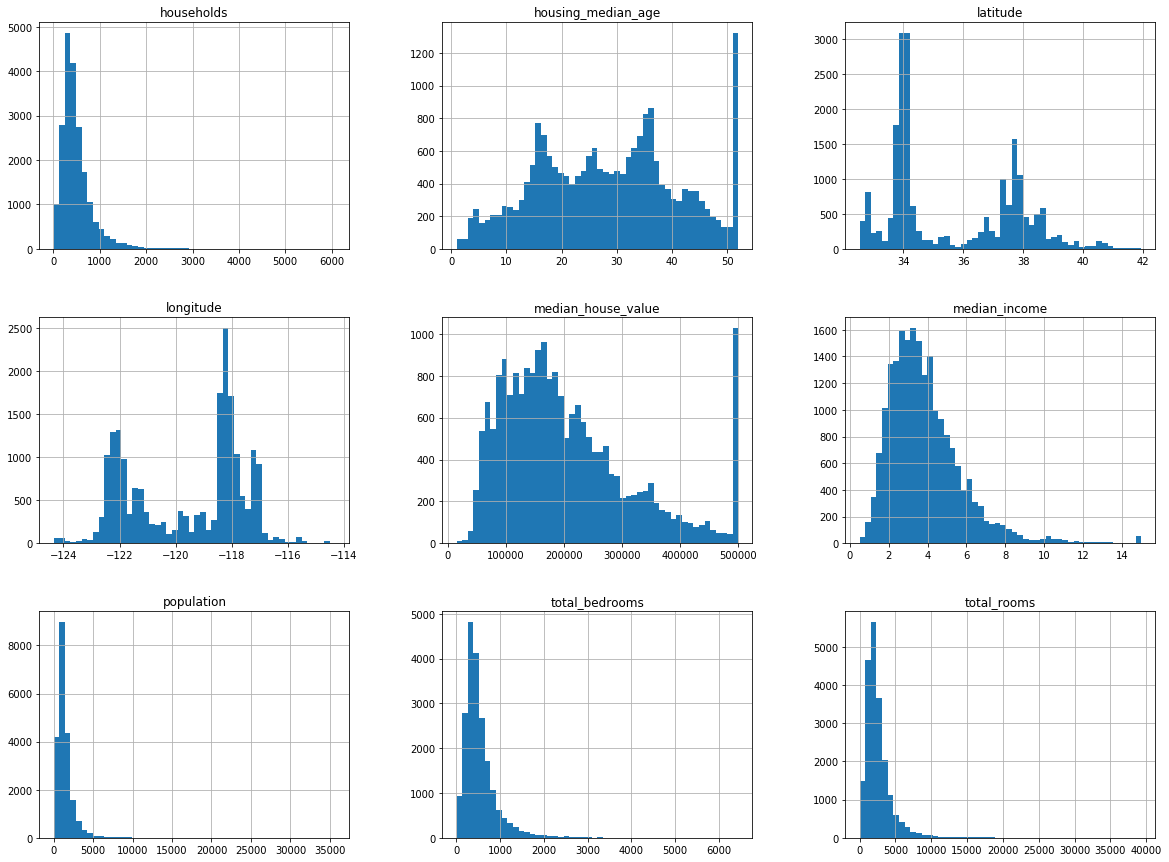

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Things to note in histogram:

1. In case of median income the graph is right skewed and data is capped at the end (which is the case with median house and median_age value as well.)
2. All the histogram are tail heavy that need to be properly scaled.
    

Below 3 functions shows how test and training set can be created 
    1. split_train_test 
    (this does is muitable ie. in case when more data sets(rows) are added the distrubiton of test/train set will not remain same, since hosuing.csv will have more rows and when we jumble the rows (increased row) it will not remain same.
    2. test_set_check : this is with unique and immutable identifier and will not get affected with additional data to data set.
    3. Import train_test_split from sklearn

In [19]:
# Note: Sklearn has similar function train_test_split()

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [20]:
# With unique and immutable identifier

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print(len(train_set), "train +", len(test_set), "test")

# Combining latitude and longitude into an ID to pass to above function

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

print(len(train_set), "train +", len(test_set), "test")


16362 train + 4278 test
16267 train + 4373 test


In [21]:
# printing the head from test set
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


Below is the demo how to use train_test_split from sklearn

In [22]:
# Import train_test_split from sklearn

from sklearn.model_selection import train_test_split
tain_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("tain_set =", len(tain_set),"and test_set =",len(test_set))

tain_set = 16512 and test_set = 4128


In [23]:
# printing the head from test set
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


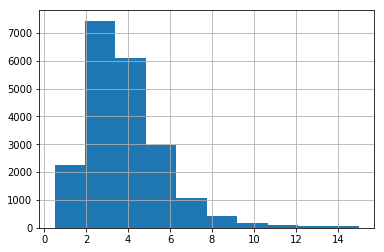

In [24]:
housing["median_income"].hist()

In [25]:
# Note ceil function gives upper limit in a decimal vale ex: 1.1 will fetch 2.0
np.ceil(1.1)

2.0

In [26]:
# Divide the above income catogary by 1.5 to limit the number of income categories
# Round up using ceil to have discrete categories

housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

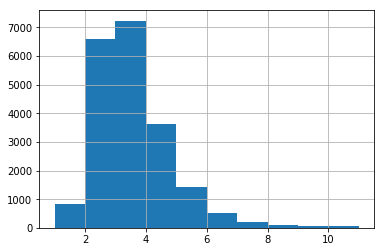

In [27]:
housing["income_cat"].hist()

In [28]:
housing["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [29]:
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [30]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

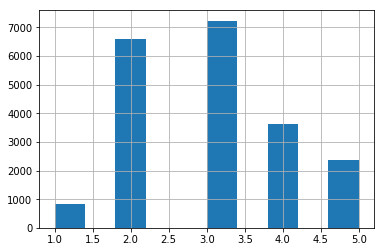

In [31]:
housing["income_cat"].hist()

Now to avoid sampiling bias we will not pick randam data intead we will use Stratified Sampling method whcih samples the test and train set using srtata not random sample or cluster sample.

In [32]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Below 3 step are just for comaprison which proves the sample that we took is best 

In [33]:
# Income category proportion in test set generated with stratified sampling
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [34]:
# Note this is being done to just compare the accuracy of strata from above sampling
# Income category proportion in full dataset

housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [35]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [36]:
# We are droping the income_cat from train and test set
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
housing = strat_train_set.copy()

# Discover and visualize the data to gain insights

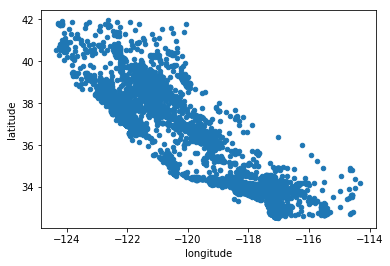

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude")

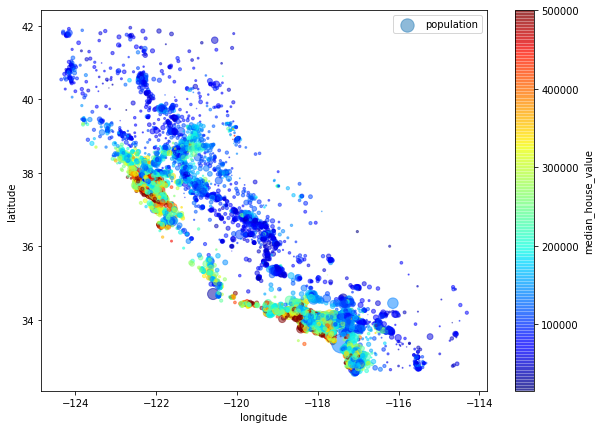

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.5,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [40]:
import matplotlib.image as mpimg
california_img=mpimg.imread('/Users/ssaran/Desktop/housing/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population'] /100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/housing/california.png'

In [ ]:
# Now we are trying to find corelation between attributes
# Note: corr() is a very helpfull function which helps in finding the corelation between the all the attributes
corr_matrix = housing.corr()
corr_matrix

Note: Since we are looking at house value, so we will try to focus on house value corelation with other attribute.

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

Note : we are trying to gain more insight in terms ploting scatter graph and observe the trend for fist 4 best corelation

In [ ]:
# from pandas.tools.plotting import scatter_matrix

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Note : It is clear that there is a coreletion between median_house_value and median_income - this can be stated looking both at scattered grap and coreletion matrix.


In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


# Experiment with more attribute and corelations 

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.head(20)

In [ ]:
corr_matrix = housing.corr()
corr_matrix

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

Note : We did not notice any patten in the other attributes, hence we will proceed with median_income.

In [ ]:
housing.describe()

# Prepare the data for Machine Learning algorithms

In [ ]:
# Let’s revert to a clean training set

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

# Note drop() creates a copy of the data and does not affect strat_train_set

In [ ]:
# Let’s experiment with sample dataset for data cleaning (looking for null values in data set)

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head(100)
sample_incomplete_rows

Note: We have 3 options 
    1. dropna() - drops the missing values
    2. drop() - drops the attribute
    3. fillna() - sets the missing values

In [ ]:
# Option one
# dropna() - drops the missing values

sample_incomplete_rows.dropna(subset=["total_bedrooms"])

In [ ]:
# Option two
# drop() - drops the attribute

sample_incomplete_rows.drop("total_bedrooms", axis=1)

In [ ]:
# Option three
# fillna() - sets the missing values
# Let’s fill the missing values with the median

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

In [ ]:
# Use Scikit-Learn Imputer class to fill missing values

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")


In [ ]:
# Remove the text attribute because median can only be calculated on numerical attributes

housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
# Fit the imputer instance to the training data

imputer.fit(housing_num)

In [ ]:
x = imputer.transform(housing_num)

In [4]:
x

NameError: name 'x' is not defined